In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector 

db = mysql.connector.connect(host = 'localhost',
                             username = 'root',
                             password = 'aman@8877',
                             database = 'ecommerce_customers')

cur = db.cursor()

### 1. List all unique cities where customers are located.

In [3]:
query = '''SELECT DISTINCT (customer_city) FROM customers WHERE customer_city IS NOT NULL'''

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


### 2. Count the number of orders placed in 2017.

In [4]:
query = '''select count(*) from orders where year(order_purchase_timestamp) = 2017'''

cur.execute(query)
data = cur.fetchall()

print("Orders placed on Year 2017",data[0][0])

Orders placed on Year 2017 45101


### 3. Find the total sales per category.

In [5]:
query = '''select products.product_category as Product_Category, round(sum(order_items.price + order_items.freight_value),2) as Total_Sales
           from products inner join order_items 
           on products.product_id = order_items.product_id 
           where product_category is not null 
           group by products.product_category
           order by Total_Sales desc'''

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=['Product Category','Sales'])
df

,Product Category,Sales
0,HEALTH BEAUTY,1441248.07
1,Watches present,1305541.61
2,bed table bath,1241681.72
3,sport leisure,1156656.48
4,computer accessories,1059272.40
...,...,...
68,flowers,1598.91
69,House Comfort 2,1170.58
70,cds music dvds,954.99
71,Fashion Children's Clothing,665.36


### 4. Calculate the percentage of orders that were paid in installments.

In [6]:
query = '''
          select (sum(case 
          when payment_installments >= 1 then 1 else 0 
          end)/count(*)) * 100
          from payments
           '''

cur.execute(query)
data = cur.fetchall()


print(data[0][0],"% of orders are paid in installments")

99.9981 % of orders are paid in installments


### 5. Count the number of customers from each state. 

[('SP', 41746), ('SC', 3637), ('MG', 11635), ('PR', 5045), ('RJ', 12852), ('RS', 5466), ('PA', 975), ('GO', 2020), ('ES', 2033), ('BA', 3380), ('MA', 747), ('MS', 715), ('CE', 1336), ('DF', 2140), ('RN', 485), ('PE', 1652), ('MT', 907), ('AM', 148), ('AP', 68), ('AL', 413), ('RO', 253), ('PB', 536), ('TO', 280), ('PI', 495), ('AC', 81), ('SE', 350), ('RR', 46)] % of orders are paid in installments


<Figure size 800x300 with 0 Axes>

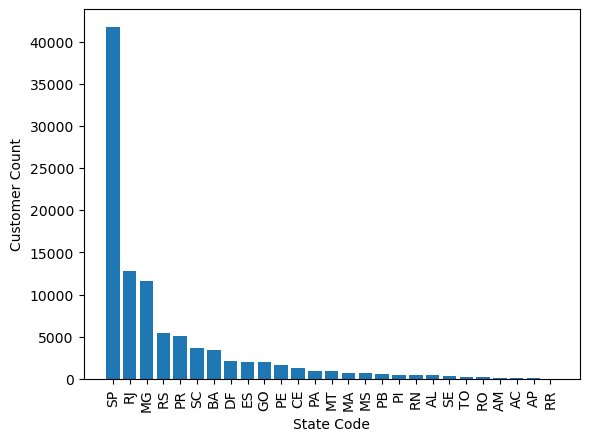

<Figure size 800x300 with 0 Axes>

In [11]:
query = '''
          select customer_state, count(customer_unique_id)
          from customers
          group by customer_state
           '''

cur.execute(query)
data = cur.fetchall()


print(data,"% of orders are paid in installments")
df = pd.DataFrame(data, columns=['State Code','Customer Count'])
df = df.sort_values(by='Customer Count', ascending=False)

plt.bar(df['State Code'], df['Customer Count'])
plt.xlabel("State Code")
plt.ylabel("Customer Count")
plt.xticks(rotation = 90)
plt.figure(figsize=(8,3))